# **Project Name**    - EMI PREDICTION

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier , XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib
from sklearn.utils.class_weight import compute_class_weight

### Dataset Loading

In [2]:
df=pd.read_csv("../data/emi_prediction_dataset.csv", low_memory=False)

### Dataset First View

In [3]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


### Dataset Rows & Columns count

In [4]:
df.shape

(404800, 27)

### Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

#### Duplicate Values

In [6]:
for col in df:
    print(df[col].value_counts())
    print()

age
38        119883
32         99924
48         80018
27         59556
58         40190
38.0         625
32.0         500
37           484
39           479
33           443
31           392
48.0         370
49           319
47           297
27.0         296
28           229
58.0         218
26           208
59           182
57           168
37.0           6
26.0           3
33.0           2
49.0           1
59.0           1
39.0           1
58.0.0         1
28.0           1
38.0.0         1
32.0.0         1
31.0           1
Name: count, dtype: int64

gender
Male      237427
Female    158351
MALE        1865
M           1843
male        1815
F           1171
female      1165
FEMALE      1163
Name: count, dtype: int64

marital_status
Married    307837
Single      96963
Name: count, dtype: int64

education
Graduate         181015
Post Graduate    100314
High School       60732
Professional      60335
Name: count, dtype: int64

monthly_salary
18000.0     4159
20000.0     2848
23400.0     

#### Missing Values/Null Values

In [7]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

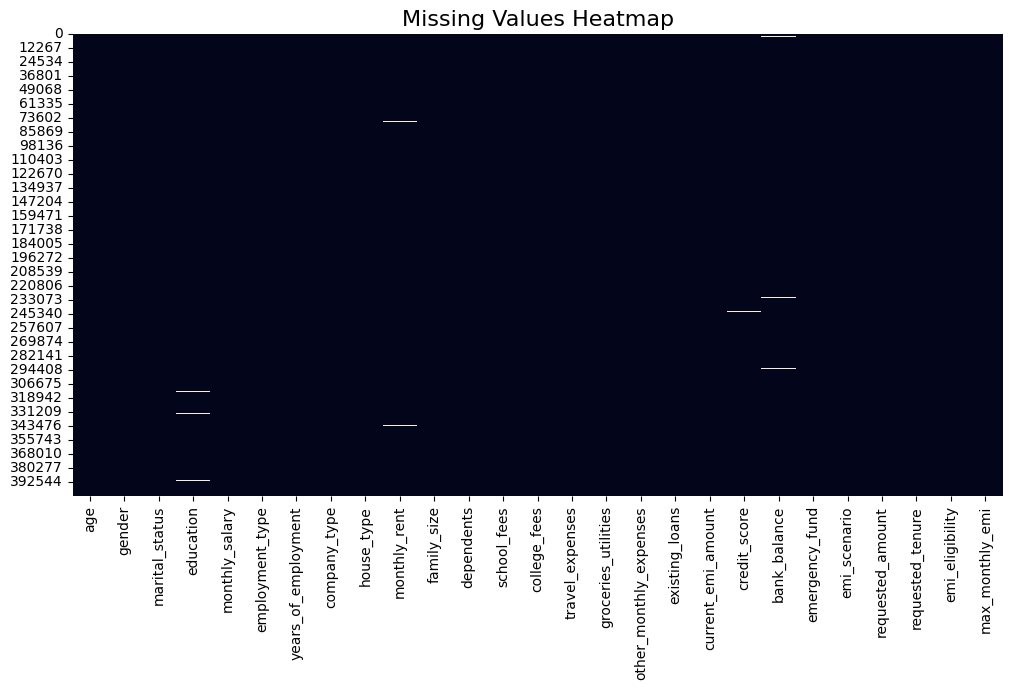

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.show()

## ***2. Understanding Your Variables***

In [9]:
df.columns

Index(['age', 'gender', 'marital_status', 'education', 'monthly_salary',
       'employment_type', 'years_of_employment', 'company_type', 'house_type',
       'monthly_rent', 'family_size', 'dependents', 'school_fees',
       'college_fees', 'travel_expenses', 'groceries_utilities',
       'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
       'requested_amount', 'requested_tenure', 'emi_eligibility',
       'max_monthly_emi'],
      dtype='object')

In [10]:
df.describe()

,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,404800.000000,402374.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,404800.000000,402380.000000,402449.000000,4.048000e+05,404800.000000,404800.000000
mean,5.364079,5828.446490,2.940425,1.940425,4624.575593,4066.253706,5687.497777,12804.999506,7119.309783,4543.407609,700.856223,96769.051731,3.708554e+05,29.126677,6763.602156
std,6.079135,8648.604639,1.075199,1.075199,5061.074401,7319.344289,3392.671132,6993.853745,4510.447300,7034.901139,88.435548,81373.053976,3.451945e+05,18.100854,7741.263317
min,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,600.000000,1800.000000,600.000000,0.000000,0.000000,1400.000000,1.000000e+04,3.000000,500.000000
25%,1.200000,0.000000,2.000000,1.000000,0.000000,0.000000,3200.000000,7700.000000,3800.000000,0.000000,654.000000,38400.000000,1.240000e+05,15.000000,500.000000
50%,3.200000,0.000000,3.000000,2.000000,3000.000000,0.000000,4900.000000,11400.000000,6000.000000,0.000000,701.000000,74000.000000,2.360000e+05,25.000000,4211.200000
75%,7.200000,10600.000000,4.000000,3.000000,9000.000000,6500.000000,7400.000000,16400.000000,9300.000000,8000.000000,748.000000,130600.000000,4.940000e+05,40.000000,9792.000000
max,36.000000,80000.000000,5.000000,4.000000,15000.000000,25000.000000,30300.000000,71200.000000,42900.000000,56300.000000,1200.000000,891500.000000,1.500000e+06,84.000000,91040.400000


### Check Unique Values for each variable.

In [11]:
for col in df:
    print(col," : ",df[col].nunique())

age  :  31
gender  :  8
marital_status  :  2
education  :  4
monthly_salary  :  13662
employment_type  :  3
years_of_employment  :  356
company_type  :  5
house_type  :  3
monthly_rent  :  4396
family_size  :  5
dependents  :  5
school_fees  :  132
college_fees  :  202
travel_expenses  :  284
groceries_utilities  :  544
other_monthly_expenses  :  373
existing_loans  :  2
current_emi_amount  :  508
credit_score  :  427
bank_balance  :  12261
emergency_fund  :  5486
emi_scenario  :  5
requested_amount  :  1491
requested_tenure  :  82
emi_eligibility  :  3
max_monthly_emi  :  15383


### Data information.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

converting age from object to int

In [13]:
df['age'] = (
    df['age']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace(r'\.0+$', '', regex=True)
    .str.replace(r'[^0-9.]', '', regex=True)
)

df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [14]:
df['age']=df['age'].astype(int)

converting monthly salary from object to float

In [15]:
df['monthly_salary'] = (
    df['monthly_salary']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace(r'\.0+$', '', regex=True)
    .str.replace(r'[^0-9.]', '', regex=True)
)
df['monthly_salary']= pd.to_numeric(df['monthly_salary'],errors='coerce')

converting credit score from float to int

In [16]:
# df['credit_score']=df['credit_score'].astype(int)

In [17]:
df['credit_score']=df['credit_score'].fillna(df['credit_score'].median()).astype(int)

converting bank balance from object to float

In [18]:
df['bank_balance'] = (
    df['bank_balance']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace(r'\.0+$', '', regex=True)
    .str.replace(r'[^0-9.]', '', regex=True)
)
df['bank_balance']= pd.to_numeric(df['bank_balance'],errors='coerce')

generalizing objects

In [19]:
cat_cols = df.select_dtypes('object').columns

for col in cat_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.lower()
        .str.strip()
        .str.replace(r'[^a-z0-9\s]', '', regex=True)
    )


In [20]:
for col in cat_cols:
    print(col, df[col].unique()[:10])


gender ['female' 'male' 'm' 'f']
marital_status ['married' 'single']
education ['professional' 'graduate' 'high school' 'post graduate' 'nan']
employment_type ['private' 'government' 'selfemployed']
company_type ['midsize' 'mnc' 'startup' 'large indian' 'small']
house_type ['rented' 'family' 'own']
existing_loans ['yes' 'no']
emi_scenario ['personal loan emi' 'ecommerce shopping emi' 'education emi'
 'vehicle emi' 'home appliances emi']
emi_eligibility ['noteligible' 'eligible' 'highrisk']


Categorical cleaning

In [21]:
# gender correction

df['gender'] = df['gender'].replace({
    'm': 'male',
    'f': 'female'
})

#employment correction
df['employment_type'] = df['employment_type'].replace({
    'selfemployed': 'self-employed'
})

In [22]:
df['education'] = df['education'].replace("nan", np.nan)

In [23]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

### Handling missing value

In [24]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                    0
monthly_salary               3
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score                 0
bank_balance              2447
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [25]:
# monthly salary
df['monthly_salary'] = df['monthly_salary'].fillna(df['monthly_salary'].median())

In [26]:
df.loc[df['house_type'] != 'rented', 'monthly_rent'] = \
    df.loc[df['house_type'] != 'rented', 'monthly_rent'].fillna(0)

df.loc[df['house_type'] == 'rented', 'monthly_rent'] = \
    df.loc[df['house_type'] == 'rented', 'monthly_rent'].fillna(
        df.loc[df['house_type'] == 'rented', 'monthly_rent'].median()
    )

In [27]:
# bank balance
# Create salary buckets (bins)
df['salary_bin'] = pd.qcut(df['monthly_salary'], q=4, labels=False)

#Impute median bank balance per salary bucket
df['bank_balance'] = df.groupby('salary_bin')['bank_balance']\
    .transform(lambda x: x.fillna(x.median()))
 #if still NaN there , fill with median
df['bank_balance'] = df['bank_balance'].fillna(df['bank_balance'].median())

In [28]:
#emergency fund

df['emergency_fund'] = df.groupby('salary_bin')['emergency_fund']\
          .transform(lambda x: x.fillna(x.median()))
df['emergency_fund'] = df['emergency_fund'].fillna(df['emergency_fund'].median())

In [29]:
df.drop(columns=['salary_bin'], inplace=True)

### Handle Outlier

In [30]:
df['age'].describe()

count    404800.000000
mean         38.875860
std           9.303593
min          26.000000
25%          32.000000
50%          38.000000
75%          48.000000
max          59.000000
Name: age, dtype: float64

In [31]:
#monthly salary
p99 = df['monthly_salary'].quantile(0.99)
df['monthly_salary'] = df['monthly_salary'].clip(0, p99)

In [32]:
#monthly rent 
df.loc[df['monthly_rent'] > df['monthly_salary'], 'monthly_rent'] = \
    df['monthly_salary'] * 0.3

#applying 95 percentile capping
r95 = df['monthly_rent'].quantile(0.95)
df['monthly_rent'] = df['monthly_rent'].clip(0, r95)


In [33]:
#credit score
df['credit_score'] = df['credit_score'].clip(300, 900)

In [34]:
#bank balance
df['bank_balance'] = df['bank_balance'].clip(lower=0)


p99 = df['bank_balance'].quantile(0.99)
df['bank_balance'] = df['bank_balance'].clip(0, p99)

In [35]:
#emergency fund
df['emergency_fund'] = df['emergency_fund'].clip(lower=0)
df.loc[df['emergency_fund'] > df['bank_balance'], 'emergency_fund'] = \
    df['bank_balance'] * 0.5

p99 = df['emergency_fund'].quantile(0.99)
df['emergency_fund'] = df['emergency_fund'].clip(0, p99)

In [36]:
#expenses
expense_cols = ['travel_expenses', 'groceries_utilities',
                'other_monthly_expenses']

for col in expense_cols:
    p99 = df[col].quantile(0.99)
    df[col] = df[col].clip(0, p99)


In [37]:
#current emi count
df.loc[df['current_emi_amount'] > df['monthly_salary'], 'current_emi_amount'] = \
    df['monthly_salary'] * 0.4   # business logic: total EMI <= 40% salary

p99 = df['current_emi_amount'].quantile(0.99)
df['current_emi_amount'] = df['current_emi_amount'].clip(0, p99)


In [38]:
#max monthly emi

df['max_monthly_emi'] = df['max_monthly_emi'].clip(lower=0)

df.loc[df['max_monthly_emi'] > df['monthly_salary'] * 0.4, 'max_monthly_emi'] = \
    df['monthly_salary'] * 0.4


### Data visualization

Text(0.5, 1.0, 'Monthly Salary Distribution')

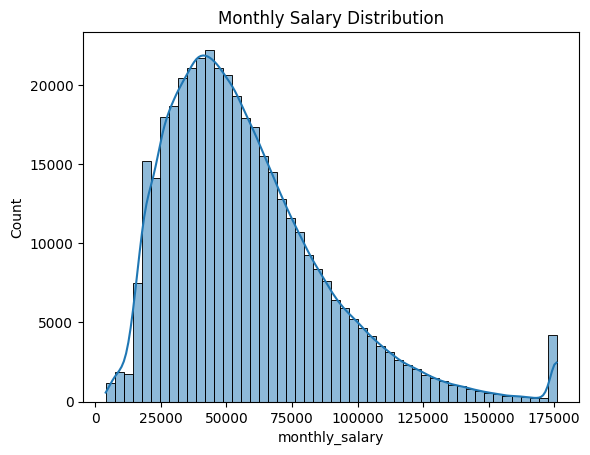

In [39]:
sns.histplot(df['monthly_salary'], bins=50, kde=True)
plt.title("Monthly Salary Distribution")

Text(0.5, 1.0, 'Credit Score Distribution')

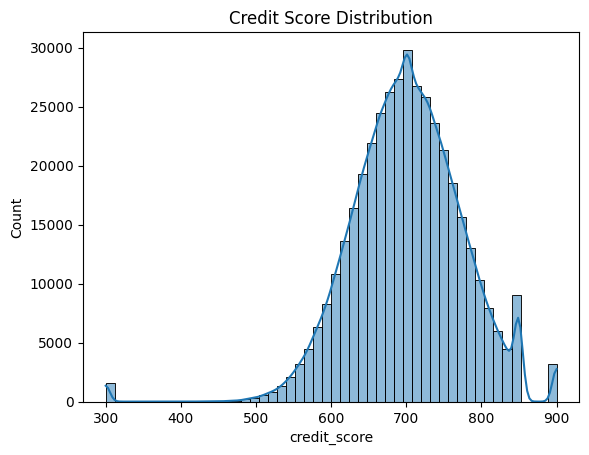

In [40]:
sns.histplot(df['credit_score'], bins=50, kde=True)
plt.title("Credit Score Distribution")

Text(0.5, 1.0, 'Current EMI Amount Distribution')

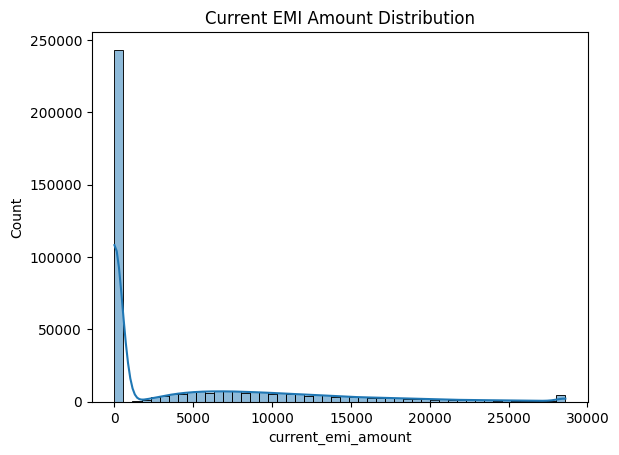

In [41]:
sns.histplot(df['current_emi_amount'], bins=50, kde=True)
plt.title("Current EMI Amount Distribution")

Text(0.5, 1.0, 'Monthly Salary Boxplot')

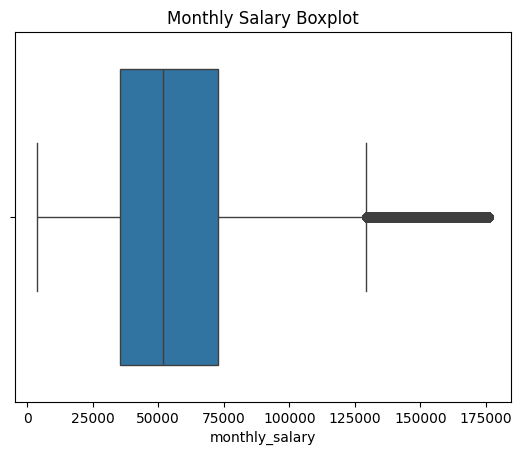

In [42]:
sns.boxplot(x=df['monthly_salary'])
plt.title("Monthly Salary Boxplot")

Text(0.5, 1.0, 'Monthly Rent Boxplot')

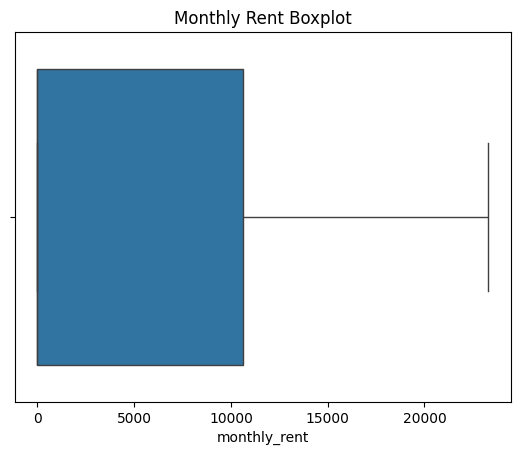

In [43]:
sns.boxplot(x=df['monthly_rent'])
plt.title("Monthly Rent Boxplot")

Text(0.5, 1.0, 'Gender Distribution')

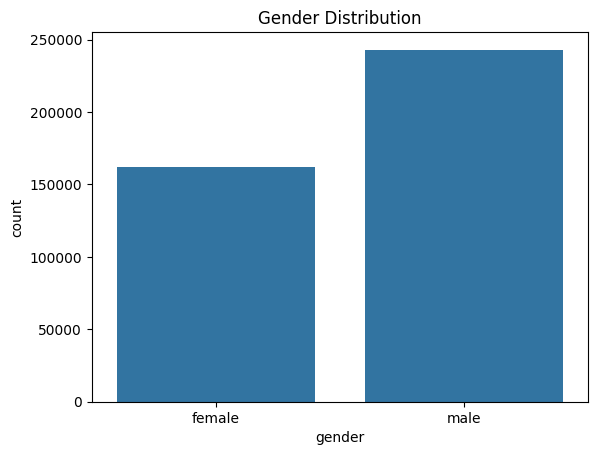

In [44]:
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Employment Type Distribution')

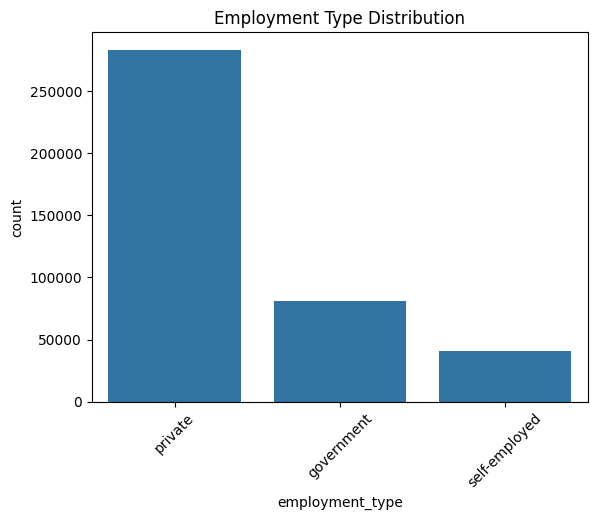

In [45]:
sns.countplot(x='employment_type', data=df)
plt.xticks(rotation=45)
plt.title("Employment Type Distribution")

Text(0.5, 1.0, 'Education Distribution')

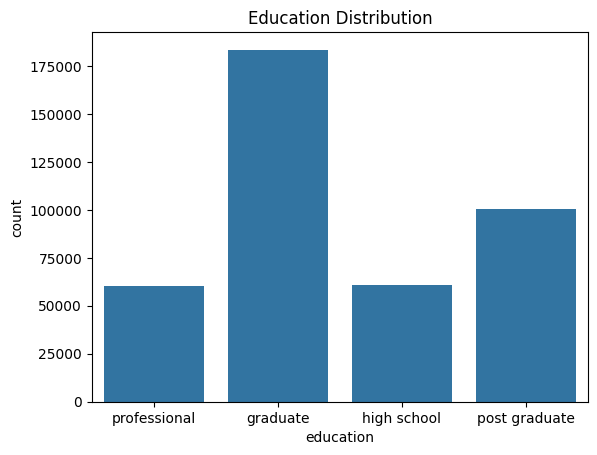

In [46]:
sns.countplot(x='education', data=df)
plt.title("Education Distribution")

Text(0.5, 1.0, 'Count of EMI Eligibility Classes')

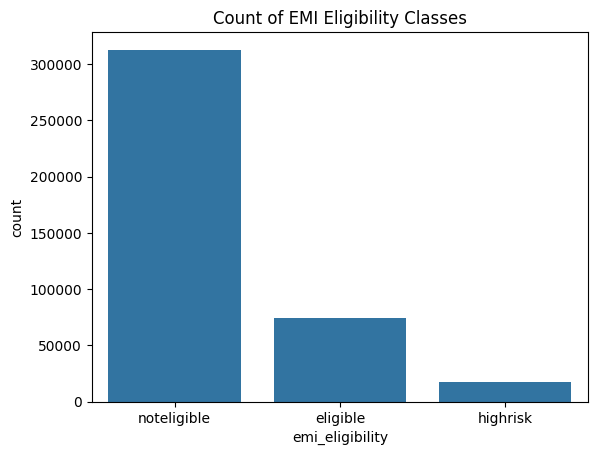

In [47]:
sns.countplot(x='emi_eligibility', data=df)
plt.title("Count of EMI Eligibility Classes")

Text(0.5, 1.0, 'Salary vs Max EMI')

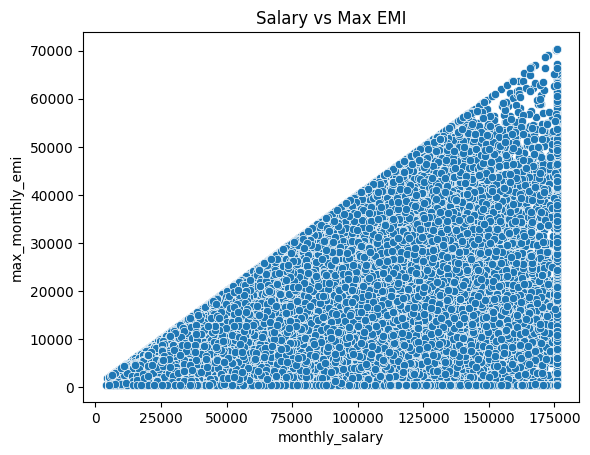

In [48]:
sns.scatterplot(x='monthly_salary', y='max_monthly_emi', data=df)
plt.title("Salary vs Max EMI")

Text(0.5, 1.0, 'Credit Score vs Max EMI')

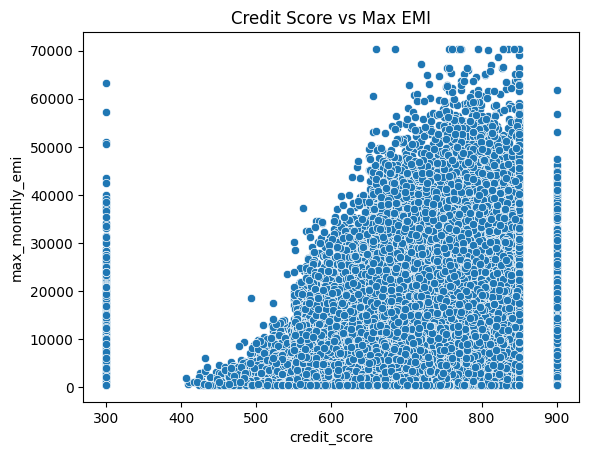

In [49]:
sns.scatterplot(x='credit_score', y='max_monthly_emi', data=df)
plt.title("Credit Score vs Max EMI")

Text(0.5, 1.0, 'Correlation Heatmap')

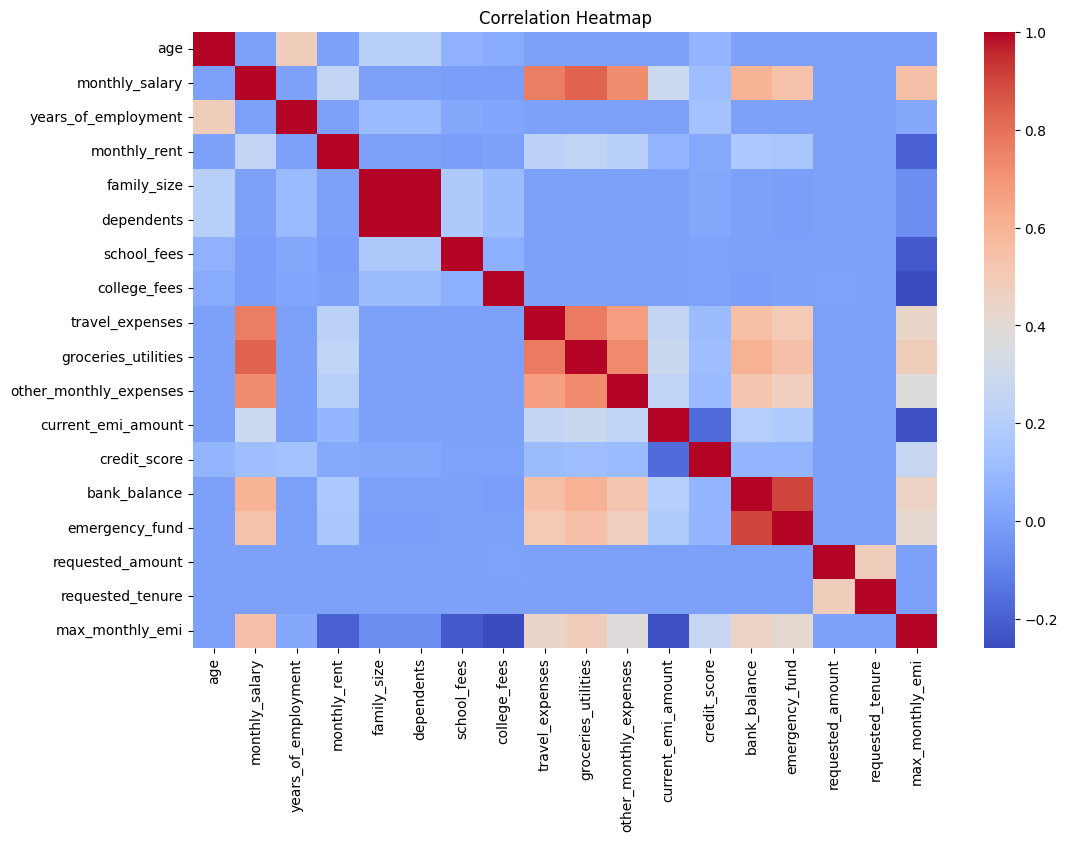

In [50]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Salary vs EMI Eligibility')

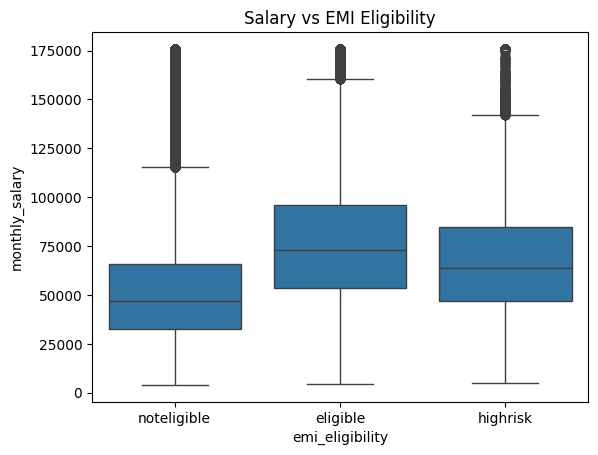

In [51]:
sns.boxplot(x='emi_eligibility', y='monthly_salary', data=df)
plt.title("Salary vs EMI Eligibility")

Text(0.5, 1.0, 'Credit Score vs EMI Eligibility')

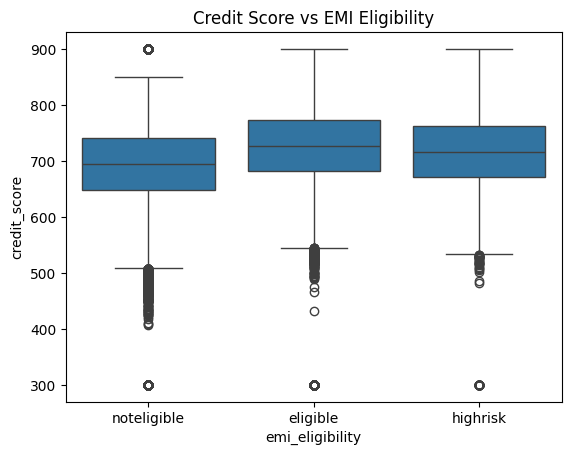

In [52]:
sns.boxplot(x='emi_eligibility', y='credit_score', data=df)
plt.title("Credit Score vs EMI Eligibility")

### Feature engineering

In [53]:
df['total_expenses'] = (
    df['groceries_utilities'] +
    df['travel_expenses'] +
    df['other_monthly_expenses']
)

In [54]:
#Money left after expenses
df['disposable_income'] = df['monthly_salary'] - df['total_expenses']

In [55]:
#EMI-to-Salary Ratio
df['emi_to_salary_ratio'] = df['current_emi_amount'] / df['monthly_salary']

In [56]:
#Debt-to-Income Ratio
df['dti'] = df['current_emi_amount'] / df['monthly_salary']

In [57]:
#Savings Ratio
df['savings_ratio'] = df['bank_balance'] / df['monthly_salary']

In [58]:
#Emergency Fund Ratio
df['emergency_ratio'] = df['emergency_fund'] / df['monthly_salary']

In [59]:
#Bank Balance Ratio
df['bank_balance_ratio'] = df['bank_balance'] / df['monthly_salary']

In [60]:
#Salary Bin or Salary Category
df['salary_bin'] = pd.qcut(df['monthly_salary'], q=4, labels=[1,2,3,4])

### Data Encoding

In [61]:
#binary encoding
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['existing_loans'] = le.fit_transform(df['existing_loans'])

In [62]:
#ordinal enoding
df['education'] = df['education'].astype(str).str.lower().str.strip()
df['education'] = df['education'].replace({
    'high school': 'highschool',
    'post graduate': 'postgraduate',
    'graduate': 'graduate',
    'professional': 'professional'
})

education_order = {
    'highschool': 1,
    'graduate': 2,
    'postgraduate': 3,
    'professional': 4
}

df['education'] = df['education'].replace(education_order).astype(int)

C:\Users\RONI\AppData\Local\Temp\ipykernel_7808\3722975064.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace(education_order).astype(int)


In [63]:
#One Hot Encoding
onehot_cols = ['employment_type', 'company_type', 'house_type', 'emi_scenario', 'salary_bin']

ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), onehot_cols)
    ],
    remainder='passthrough'
)

In [64]:
le_target = LabelEncoder()
df['emi_eligibility'] = le_target.fit_transform(df['emi_eligibility'])

In [65]:
df = pd.get_dummies(
    df,
    columns=['employment_type', 'company_type', 'house_type', 'emi_scenario', 'salary_bin'],
    drop_first=True
)

In [66]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

### Spliting Data

In [67]:
X_clf = df.drop('emi_eligibility', axis=1)
y_clf = df['emi_eligibility']

In [68]:
X_reg = df.drop('max_monthly_emi', axis=1)
y_reg = df['max_monthly_emi']

In [69]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Model Implementation

## 1. Classification models

#### Model 1 :  Logistic Regression

In [70]:
#Training
log_clf = LogisticRegression(solver='lbfgs',max_iter=200,n_jobs=-1, random_state=42)
log_clf.fit(X_train_clf, y_train_clf)
# Predictions
y_pred_log = log_clf.predict(X_test_clf)

# Accuracy
acc = accuracy_score(y_test_clf, y_pred_log)
print(f"Accuracy Score: {acc:.4f}")

# Precision, Recall, F1
precision = precision_score(y_test_clf, y_pred_log, average='macro')
recall = recall_score(y_test_clf, y_pred_log, average='macro')
f1 = f1_score(y_test_clf, y_pred_log, average='macro')
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro):    {recall:.4f}")
print(f"F1-Score (macro):  {f1:.4f}")

Accuracy Score: 0.8827
Precision (macro): 0.6204
Recall (macro):    0.5791
F1-Score (macro):  0.5669


#### Model 2 : Random Forest Classifier

In [71]:
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(X_test_clf)

acc = accuracy_score(y_test_clf, y_pred_rf)
precision = precision_score(y_test_clf, y_pred_rf, average='macro')
recall = recall_score(y_test_clf, y_pred_rf, average='macro')
f1 = f1_score(y_test_clf, y_pred_rf, average='macro')

print("Random Forest Classifier Results")
print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro):    {recall:.4f}")
print(f"F1-Score (macro):  {f1:.4f}")

Random Forest Classifier Results
Accuracy: 0.9411
Precision (macro): 0.9278
Recall (macro):    0.6450
F1-Score (macro):  0.6444


#### Model 3 : XGBoost Classifier

In [72]:
xgb_clf = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_clf.fit(X_train_clf, y_train_clf)
y_pred_xgb = xgb_clf.predict(X_test_clf)

acc = accuracy_score(y_test_clf, y_pred_xgb)
precision = precision_score(y_test_clf, y_pred_xgb, average='macro')
recall = recall_score(y_test_clf, y_pred_xgb, average='macro')
f1 = f1_score(y_test_clf, y_pred_xgb, average='macro')

print("XGBoost Classifier Results")
print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro):    {recall:.4f}")
print(f"F1-Score (macro):  {f1:.4f}")

XGBoost Classifier Results
Accuracy: 0.9882
Precision (macro): 0.9577
Recall (macro):    0.9369
F1-Score (macro):  0.9468


## 2. Regression models

#### Model 4 :  Linear Regression

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg)

# Metrics
mae = mean_absolute_error(y_test_reg, y_pred_lin)
mse = mean_squared_error(y_test_reg, y_pred_lin)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_lin)

print("Linear Regression Results")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Linear Regression Results
MAE  : 2383.53
MSE  : 11968780.97
RMSE : 3459.59
R²   : 0.7949


#### Model 5 :  Random Forest Rgressor

In [74]:
rf_reg = RandomForestRegressor(n_estimators=100,max_depth=15,min_samples_split=20,min_samples_leaf=5,n_jobs=-1,random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

# Metrics
mae = mean_absolute_error(y_test_reg, y_pred_rf)
mse = mean_squared_error(y_test_reg, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_rf)

print("Random Forest Regressor Results")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

Random Forest Regressor Results
MAE  : 603.47
MSE  : 1396648.04
RMSE : 1181.80
R²   : 0.9761


#### Model 6 :  XGBoost Rgressor

In [75]:
# Train model
xgb_reg = XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6
)
xgb_reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred_xgb = xgb_reg.predict(X_test_reg)

# Evaluation
mae = mean_absolute_error(y_test_reg, y_pred_xgb)
mse = mean_squared_error(y_test_reg, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_xgb)

print("XGBoost Regressor Results")
print(f"Mean Absolute Error (MAE):     {mae:.2f}")
print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")
print(f"R² Score:                      {r2:.4f}")

XGBoost Regressor Results
Mean Absolute Error (MAE):     565.64
Mean Squared Error (MSE):      865859.17
Root Mean Squared Error (RMSE):930.52
R² Score:                      0.9852


# Run the Best Models Again to Update Variables

## Best Classification Model

### XGBoost Classifier

In [76]:
classes = np.unique(y_train_clf)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_clf)
weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

# Train balanced XGBoost model
xgb_clf = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    n_estimators=300,         
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    sample_weight=None         
)

# Fit with sample weights
sample_weights = y_train_clf.map(weight_dict)

xgb_clf.fit(X_train_clf, y_train_clf, sample_weight=sample_weights)

# Predict
y_pred_xgb = xgb_clf.predict(X_test_clf)

# Metrics
acc = accuracy_score(y_test_clf, y_pred_xgb)
precision = precision_score(y_test_clf, y_pred_xgb, average='macro')
recall = recall_score(y_test_clf, y_pred_xgb, average='macro')
f1 = f1_score(y_test_clf, y_pred_xgb, average='macro')

print("Balanced XGBoost Classifier Results")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Balanced XGBoost Classifier Results
Accuracy:  0.9593
Precision: 0.8359
Recall:    0.9607
F1 Score:  0.8734


## Best Regression Model

### XGBoost Regressor

In [77]:
# Train model
xgb_reg = XGBRegressor(random_state=42,objective='reg:squarederror',n_estimators=300,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,n_jobs=-1)
xgb_reg.fit(X_train_reg, y_train_reg)

# Predict
y_pred_xgb = xgb_reg.predict(X_test_reg)

# Evaluation
mae = mean_absolute_error(y_test_reg, y_pred_xgb)
mse = mean_squared_error(y_test_reg, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_xgb)

print("XGBoost Regressor Results")
print(f"Mean Absolute Error (MAE):     {mae:.2f}")
print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")
print(f"R² Score:                      {r2:.4f}")

XGBoost Regressor Results
Mean Absolute Error (MAE):     605.70
Mean Squared Error (MSE):      942604.33
Root Mean Squared Error (RMSE):970.88
R² Score:                      0.9838


# Save the best models as pickle file

## Classification model pickle

In [84]:
joblib.dump(
    (xgb_clf, X_train_clf.columns.tolist()),
    "../models/best_classifier_model.pkl"
)

['../models/best_classifier_model.pkl']

## Regression model pickle

In [85]:
joblib.dump(
    (xgb_reg, X_train_reg.columns.tolist()),
    "../models/best_regression_model.pkl"
)

['../models/best_regression_model.pkl']